In [ ]:

import os
import numpy as np
import pandas as pd
import cv2
import gc
from tqdm import tqdm
from glob import glob


In [ ]:
from google.colab import  drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dirs=os.listdir('/content/gdrive/MyDrive/data')
print(dirs)

['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth', 'data_preprocess.npz', 'data_preprocess1.npz']


In [ ]:
import glob
folder = '/content/gdrive/MyDrive/data/Mask'
path = glob.glob(folder + '/*.jpg')

label=['Mask']*len(path)
print(label)

['Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask',

In [ ]:
main_directory = '/content/gdrive/MyDrive/data'

# Get all directories within the main directory
dirs = [d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d))]

images_path = []
labels = []

for folder in dirs:
    path = glob.glob(os.path.join(main_directory, folder, '*.jpg'))
    label = [folder] * len(path)
    images_path.extend(path)
    labels.extend(label)


print(labels)

['Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask', 'Mask',

In [ ]:
img_path= images_path[1]
img = cv2.imread(img_path)

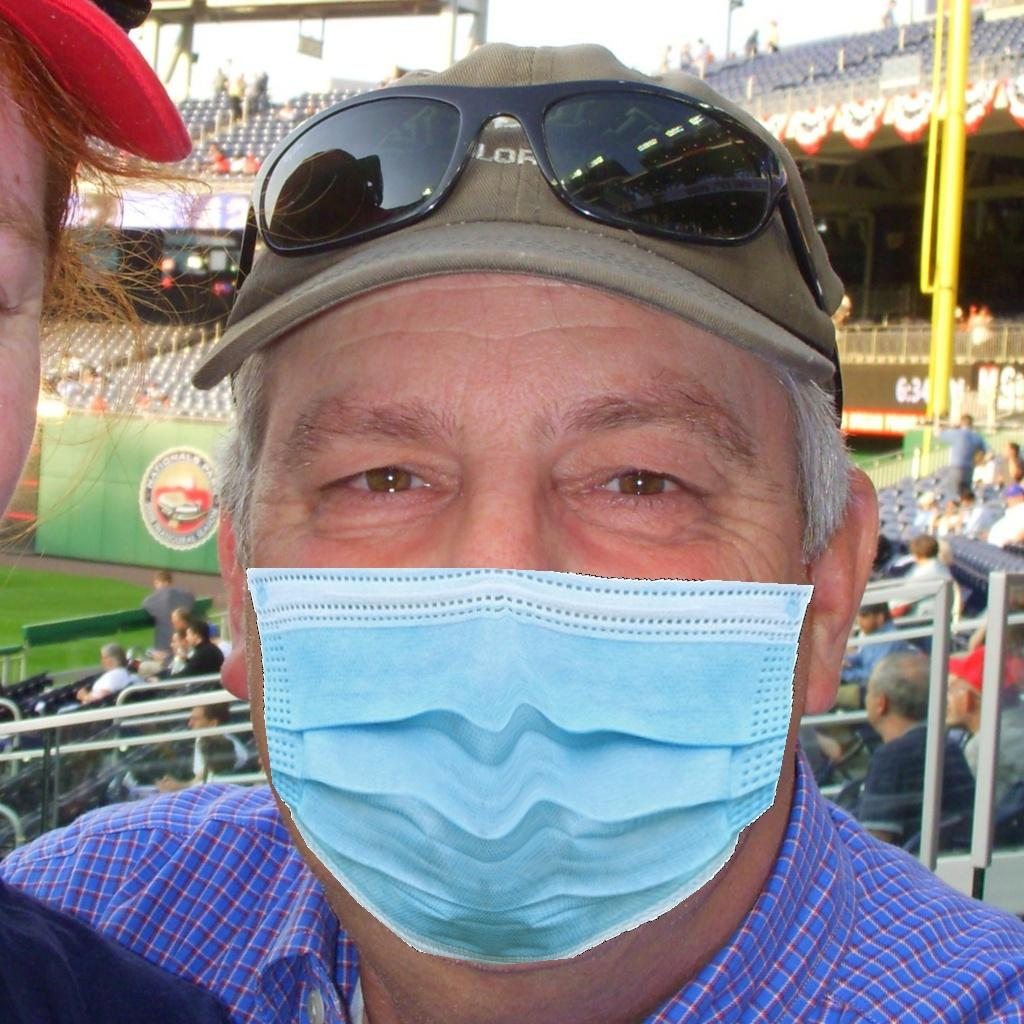

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [ ]:
# face detection
face_detection_model = cv2.dnn.readNetFromCaffe('/content/gdrive/MyDrive/deploy.prototxt.txt',
                                            '/content/gdrive/MyDrive/res10_300x300_ssd_iter_140000.caffemodel')

In [ ]:
def face_detection_dnn(img):
    # blob from image (rgb mean subraction image)
    image = img.copy()
    h,w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,117,123),swapRB=True)
    # get the detections
    face_detection_model.setInput(blob)
    detections = face_detection_model.forward()
    for i in range(0,detections.shape[2]):
        confidence = detections[0,0,i,2] # confidence score
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            box = box.astype(int)
            #print(box)
            pt1 = (box[0],box[1])
            pt2 = (box[2],box[3])
            #cv2.rectangle(image,pt1,pt2,(0,255,0),2)
            roi = image[box[1]:box[3],box[0]:box[2]]

            return roi
    return None


In [ ]:
image_roi = face_detection_dnn(img)

In [ ]:
from google.colab.patches import cv2_imshow


cv2_imshow(img)
if image_roi is not None:
   cv2_imshow(image_roi)
else:
   print('Görüntü yüklenemedi')


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import numpy as np

def datapreprocess(img):
    # blob from image (rgb mean subtraction image)
    face = face_detection_dnn(img)

    if face is not None and face.size > 0:
        # computing blob from image
        blob = cv2.dnn.blobFromImage(face, 1, (100, 100), (104, 117, 123), swapRB=True)

        # Perform additional transformations on the blob
        blob_squeeze = np.squeeze(blob).T
        blob_rotate = cv2.rotate(blob_squeeze, cv2.ROTATE_90_CLOCKWISE)
        blob_flip = cv2.flip(blob_rotate, 1)

        # Check if the blob_flip is empty before resizing
        if blob_flip.size == 0:
            return None

        # Resize the blob to the desired size
        img_norm = cv2.resize(blob_flip, (100, 100))

        # Remove negative values and normalize
        img_norm = np.maximum(img_norm, 0) / img_norm.max()

        return img_norm
    else:
        return None

In [ ]:
len(images_path)

10000

In [ ]:

data_img = []
label_img = []
i = 0
for path,label in tqdm(zip(images_path, labels), desc='preprocessing'):
    img = cv2.imread(path)
    process_img = datapreprocess(img)

    if process_img is not None:
        data_img.append(process_img)
        label_img.append(label)

    i += 1
    if i % 100 == 0:
        gc.collect()

preprocessing: 10000it [1:03:26,  2.63it/s]


In [ ]:
X = np.array(data_img)
y = np.array(label_img)

In [ ]:
X.shape, y.shape

((9968, 100, 100, 3), (9968,))

In [ ]:
np.savez('/content/gdrive/MyDrive/data/data_preprocess1.npz',X,y)